## Usage for puppy

In [8]:
%load_ext autoreload
%autoreload 2
import sys, os
save_path = os.path.abspath('../safety_sets/')

import numpy as np

from Shapes.RaceTrack import RaceTrack
from Shapes.utils import toLocal

import matplotlib.pyplot as plt
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Refer to the load_track function in the MPC agent.

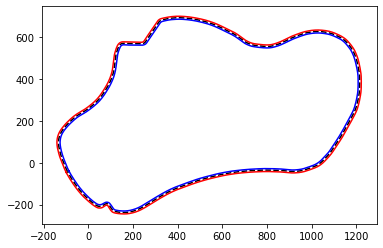

In [6]:
## No need to instantiate the RaceTrack in the agent; Loaded here for demonstration.
## Refer to the load_track function in the MPC agent.
trackName = 'Thruxton'
track = RaceTrack(trackName)

plt.plot(track.centerline_arr[:, 0],track.centerline_arr[:, 1], 'k--')
plt.plot(track.inside_arr[:, 0], track.inside_arr[:, 1], 'b')
plt.plot(track.outside_arr[:, 0], track.outside_arr[:, 1], 'r')

### 1. Index along the racetrack via *info\['track_idx'\]* returned from the environment

In [11]:
idx = 100 # this represents info['track_idx'] returned from the environment
nearest_idx = idx//24 * 24 # This index is used to find the correponnding safety set. 
safety = np.load(f"{save_path}/{trackName}/{nearest_idx}.npz")

### 2a. Get current state, (special focus to yaw), referring to the unpack_state function in the MPC agent. 
### 2b. Transform to local coordinate system. Complete the existing toLocal function.

In [16]:
# Use the racetrack geometry at the nearest_idx instead of the idx for coordinate transform
origin = track.centerline_arr[nearest_idx]
yaw0 = track.race_yaw[nearest_idx]

### 3. Get the interpolated value function at the current state (in local coordinate)

In [15]:
from scipy.interpolate import interpn
local_state = np.array([5, 2, 10, 1.5])
grid = (safety['x'], safety['y'], safety['v'], safety['yaw'])
V_est = interpn(grid, safety['V'], local_state)
print(V_est)


[1.90984568]
